# Лабораторная работа 6
## Линейная Регрессия в sklearn
## Выполнил: 6131-010302D, Пчелкина Юлия Жиганшевна

####  0. Найти и загрузить датасет, подходящий для задачи регрессии. 

Набор данных должен содержать не только числовые, но и категориальные/бинарные признаки. Опишите данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений.

In [1]:
import numpy as np
import pandas as pd

Моллюск (морское ушко)

Возраст морского ушка определяют, разрезая раковину через конус, окрашивая ее и подсчитывая количество колец под микроскопом.

Для предсказания возраста используются и другие измерения (которые легче получить). 

In [2]:
df = pd.read_csv('abalone.csv', sep=',')

In [3]:
df

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


Столбцы:

- Sex - Пол (мужской, женский, ребенок). Категориальный признак.

- Length - Длина (самое длинный замер раковины). Вещественный тип.

- Diameter - Диаметр (замеряется перпендикулярно длине). Вещественный тип.

- Height - Высота (моллюск с панцирем). Вещественный тип.

- WholeWeight - Полный вес. Вещественный тип.

- ShuckedWeight - Вес моллюска (без раковины). Вещественный тип.

- VisceraWeight - Вес внутренностей моллюска (после "кровотечения"). Вещественный тип.

- ShellWeight - Вес корпуса (после сушки). Вещественный тип.

- Rings - Кольца (дает возраст в годах). Целочисленный тип.

#### 1. Временно удалить категориальные / бинарные признаки, оставив только вещественные

In [4]:
df_new = df.drop('Sex', axis=1)
df_new.head()

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


#### 2. Визуализировать heatmap-матрицу кореллированности признаков.

In [5]:
import seaborn as sns

<AxesSubplot:>

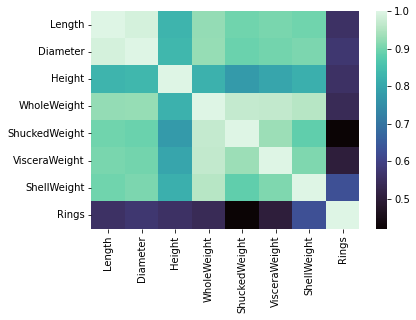

In [6]:
sns.heatmap(df_new.corr(), cmap = "mako")

#### 3. Визуализировать взаимосвязь между целевой переменной и каждым признаком 

Лучше всего, если будете строить диаграмму попарного распределения не между ВСЕМИ парами признаков, а только между признаками и целевой переменной.

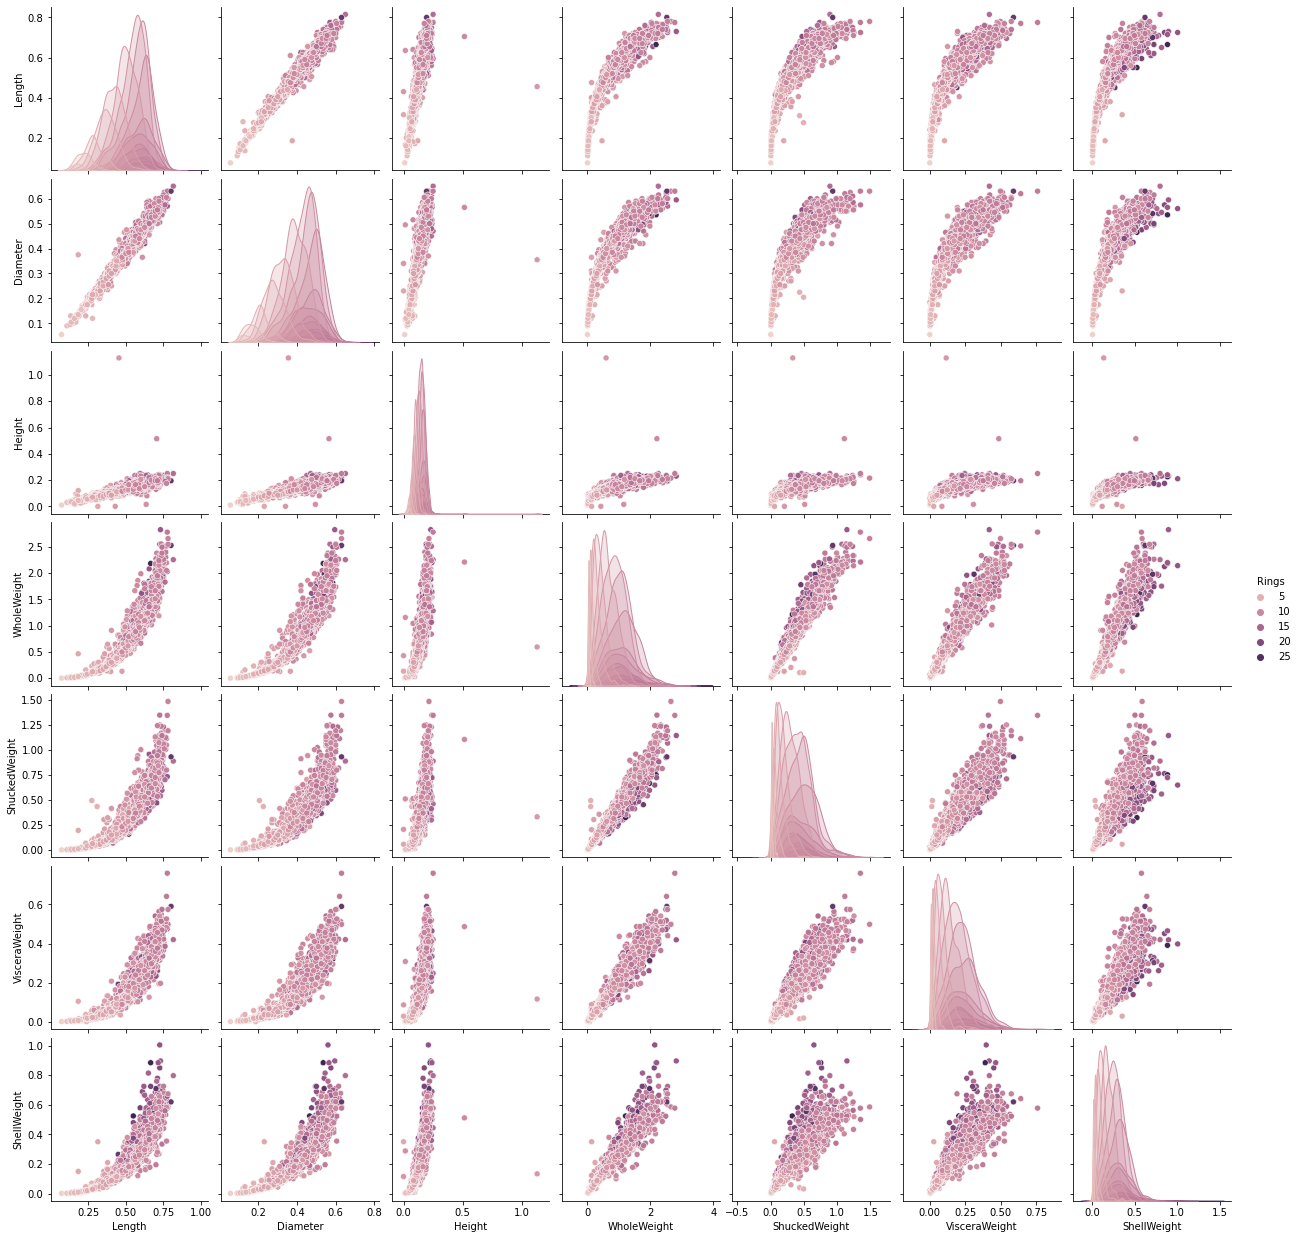

In [7]:
sns.pairplot(df_new, hue = "Rings")

#### 4. Разделить набор данных на обучающую и тестовую выборки

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df_new.drop('Rings', axis = 1)
Y = df_new.Rings

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.75, random_state = 25)

In [11]:
X_train

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight
369,0.690,0.560,0.215,1.7190,0.6800,0.2990,0.470
3869,0.490,0.385,0.160,0.6560,0.2455,0.1710,0.205
3334,0.390,0.300,0.105,0.2590,0.0955,0.0380,0.085
1391,0.635,0.495,0.175,1.2110,0.7070,0.2725,0.323
90,0.565,0.425,0.135,0.8115,0.3410,0.1675,0.255
...,...,...,...,...,...,...,...
1175,0.640,0.515,0.165,1.3690,0.6320,0.3415,0.358
255,0.560,0.450,0.175,1.0110,0.3835,0.2065,0.370
2934,0.620,0.475,0.150,0.9545,0.4550,0.1865,0.277
2191,0.645,0.495,0.185,1.4935,0.5265,0.2785,0.455


#### 5. Линейная регрессия

In [12]:
from sklearn.linear_model import LinearRegression

##### 5.1 Обучить модель линейной регрессии (LinearRegression)

In [13]:
# обучение модели
model_regress = LinearRegression()
model_regress.fit(X_train, Y_train)
pred_train = model_regress.predict(X_train)
pred_test = model_regress.predict(X_test)

##### 5.2 Вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе


In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [15]:
def metrics(pred_model, Y_data):
    mae = mean_absolute_error(Y_data, pred_model)
    mse = mean_squared_error(Y_data, pred_model)
    r2 = r2_score(Y_data, pred_model)
    print('MAE: ', mae)
    print('MSE: ', mse)
    print('R2: ', r2)

In [16]:
print('метрики на обущающем наборе')
metrics(pred_train, Y_train)

метрики на обущающем наборе
MAE:  1.6191293012541543
MSE:  4.920979200380503
R2:  0.5394923513422314


In [17]:
print('метрики на тестовом наборе')
metrics(pred_test, Y_test)

метрики на тестовом наборе
MAE:  1.6027403030598926
MSE:  5.412407760815443
R2:  0.43110839056871564


##### 5.3 Вывести model.coef_ и model.intercept_

In [18]:
def intercept_coef(model):
    importance = model_regress.coef_
    print('coef: ', importance)
    intercept = model_regress.intercept_
    print('intercept: ', intercept)
    

In [19]:
intercept_coef(model_regress)

coef:  [ -3.71240492  13.34584411  28.13630192   9.47897395 -20.28652372
 -11.49063914   6.62644531]
intercept:  2.4671351159702306


##### 5.4 Построить график (barh) с важностью коэфициентов при соответствующих признаках 

Желательно, чтобы сверху вниз шли коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси.

In [20]:
def barh_plot(model, X_data):
    attribute = X_data.columns.values
    importance = model.coef_
    list1 = np.vstack([importance, attribute]).T
    list2 = pd.DataFrame(data = {'importance': importance, 'attribute': X_data.columns, }).sort_values(by = 'importance')
    print(list2)
    sns.barplot(data = list2, y = 'attribute', x = 'importance')
    

   importance      attribute
4  -20.286524  ShuckedWeight
5  -11.490639  VisceraWeight
0   -3.712405         Length
6    6.626445    ShellWeight
3    9.478974    WholeWeight
1   13.345844       Diameter
2   28.136302         Height


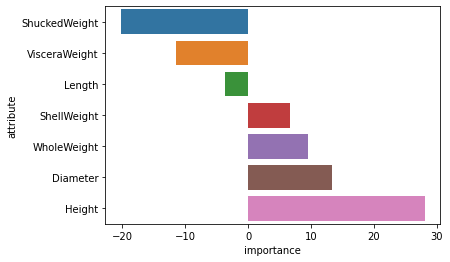

In [21]:
barh_plot(model_regress, X_train)

#### 6. Модель Lasso

In [22]:
from sklearn.linear_model import Lasso

##### 6.1 Обучить модель регрессии (Lasso), с помощью GridSearchCV подобрать параметр alpha, дальше работаем с лучшей моделью

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
model_lasso = Lasso()

# подбираем параметры
parametrs = {"alpha": np.arange(0.01, 100, 0.01)}
model_lasso = GridSearchCV(model_lasso, parametrs, refit = True)
model_lasso.fit(X_train, Y_train)

print(model_lasso.best_params_)

{'alpha': 0.01}


In [25]:
# обучение модели
model_lasso = Lasso(alpha = 0.01)
model_lasso.fit(X_train, Y_train)
pred_lasso_train = model_lasso.predict(X_train)
pred_lasso_test = model_lasso.predict(X_test)

##### 6.2 Для лучшей модели вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе

In [26]:
print('метрики на обущающем наборе')
metrics(pred_lasso_train, Y_train)

метрики на обущающем наборе
MAE:  1.673467741329346
MSE:  5.287448079385342
R2:  0.505198013791746


In [27]:
print('метрики на тестовом наборе')
metrics(pred_lasso_test, Y_test)

метрики на тестовом наборе
MAE:  1.5742570476962772
MSE:  4.652489607344447
R2:  0.5109824651892559


##### 6.3 Для лучшей модели вывести model.coef_ и model.intercept_

In [28]:
intercept_coef(model_lasso)

coef:  [ -3.71240492  13.34584411  28.13630192   9.47897395 -20.28652372
 -11.49063914   6.62644531]
intercept:  2.4671351159702306


##### 6.4 Для лучшей модели построить график (barh) с важностью коэфициентов при соответствующих признаках

   importance      attribute
4  -14.338358  ShuckedWeight
0    0.000000         Length
2    0.000000         Height
5   -0.000000  VisceraWeight
3    4.719350    WholeWeight
1    8.916454       Diameter
6   12.503192    ShellWeight


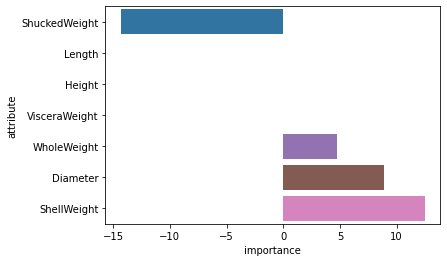

In [29]:
barh_plot(model_lasso, X_train)

#### 7. Модель Ridge

In [30]:
from sklearn.linear_model import Ridge

##### 7.1 Обучить модель регрессии (Ridge), с помощью GridSearchCV подобрать параметр alpha, дальше работаем с лучшей моделью

In [31]:
model_ridge = Ridge()

# подбираем параметры
parametrs = {"alpha": np.arange(0.01, 100, 0.01)}
model_ridge = GridSearchCV(model_ridge, parametrs, refit = True)
model_ridge.fit(X_train, Y_train)

print(model_ridge.best_params_)

{'alpha': 0.04}


In [32]:
# обучение модели
model_ridge = Ridge(alpha = 0.04)
model_ridge.fit(X_train, Y_train)
pred_ridge_train = model_ridge.predict(X_train)
pred_ridge_test = model_ridge.predict(X_test)

##### 7.2 Для лучшей модели вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе

In [33]:
print('метрики на обущающем наборе')
metrics(pred_ridge_train, Y_train)

метрики на обущающем наборе
MAE:  1.6193304366122918
MSE:  4.9216488646637835
R2:  0.5394296838299485


In [34]:
print('метрики на тестовом наборе')
metrics(pred_ridge_test, Y_test)

метрики на тестовом наборе
MAE:  1.5987150595774602
MSE:  5.320334457763602
R2:  0.4407861036815437


##### 7.3 Для лучшей модели вывести model.coef и model.intercept

In [35]:
intercept_coef(model_ridge)

coef:  [ -3.71240492  13.34584411  28.13630192   9.47897395 -20.28652372
 -11.49063914   6.62644531]
intercept:  2.4671351159702306


##### 7.4 Для лучшей модели построить график (barh) с важностью коэфициентов при соответствующих признаках

   importance      attribute
4  -20.143350  ShuckedWeight
5  -11.159632  VisceraWeight
0   -3.043794         Length
6    6.940194    ShellWeight
3    9.313911    WholeWeight
1   12.762632       Diameter
2   26.752567         Height


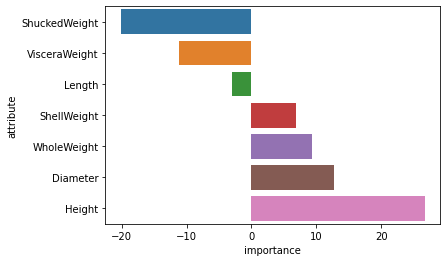

In [36]:
barh_plot(model_ridge, X_train)

#### 8. Модель ElasticNet

In [37]:
from sklearn.linear_model import ElasticNet

##### 8.1 Обучить модель регрессии (ElasticNet), с помощью GridSearchCV подобрать параметры alpha и l1_ratio (в пределах 0:1), дальше работаем с лучшей моделью

In [38]:
model_elastic = ElasticNet()

# подбираем параметры
parametrs = {"alpha": np.arange(0.01, 1, 0.01), "l1_ratio": np.arange(0.01, 1, 0.01)}

model_elastic = GridSearchCV(model_elastic, parametrs, refit = True)
model_elastic.fit(X_train, Y_train)

print(model_elastic.best_params_)

{'alpha': 0.01, 'l1_ratio': 0.99}


In [39]:
# обучение модели
model_elastic = ElasticNet(alpha = 0.01, l1_ratio = 0.99)
model_elastic.fit(X_train, Y_train)
pred_elastic_train = model_elastic.predict(X_train)
pred_elastic_test = model_elastic.predict(X_test)

##### 8.2 Для лучшей модели вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе

In [40]:
print('метрики на обущающем наборе')
metrics(pred_elastic_train, Y_train)

метрики на обущающем наборе
MAE:  1.6766059341236288
MSE:  5.31072201295984
R2:  0.5030200276656147


In [41]:
print('метрики на тестовом наборе')
metrics(pred_elastic_test, Y_test)

метрики на тестовом наборе
MAE:  1.577033670506407
MSE:  4.66561699808395
R2:  0.5096026610844182


##### 8.3 Для лучшей модели вывести model.coef и model.intercept

In [42]:
intercept_coef(model_elastic)

coef:  [ -3.71240492  13.34584411  28.13630192   9.47897395 -20.28652372
 -11.49063914   6.62644531]
intercept:  2.4671351159702306


##### 8.4 Для лучшей модели построить график (barh) с важностью коэфициентов при соответствующих признаках

   importance      attribute
4  -13.981626  ShuckedWeight
2    0.000000         Height
5   -0.000000  VisceraWeight
0    0.673244         Length
3    4.682611    WholeWeight
1    7.795194       Diameter
6   12.273962    ShellWeight


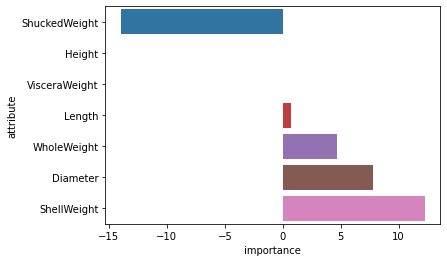

In [43]:
barh_plot(model_elastic, X_train)

#### 9. Выбрать лучшую модель, указать значения MAE, MSE и R2 на тестовом наборе

Лучшая модель Lasso Regression

метрики на тестовом наборе
- MAE:  1.5742570476962772
- MSE:  4.652489607344447
- R2:  0.5109824651892559

#### 10. Возвращаем категориальные / бинарные признаки на место в датасет.

Категориальные признаки преобразуем в набор бинарных через pd.get_dummies( ..., drop_first = True ). Обучаем лучшую модель.

In [44]:
from pandas import get_dummies

In [45]:
df_full = get_dummies(df, drop_first = True)
df_full.drop(columns = 'Sex_I', inplace = True)
df_full.head()

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0


In [46]:
X = df_full.drop('Rings', axis = 1)
#Y = df_new.Rings
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.75, random_state = 25)

In [48]:
model_best = Lasso(alpha = 0.01)
model_best.fit(X_train, Y_train)
pred_best_test = model_best.predict(X_test)

#### 11. Как изменились метрики MAE и MSE на тестовом наборе, вывести их и сделать выводы

In [49]:
print('метрики на тестовом наборе')
metrics(pred_best_test, Y_test)

метрики на тестовом наборе
MAE:  1.5641519727106916
MSE:  4.61442202996133
R2:  0.5149837020364533


Значения метрик MAE и MSE улучшились, но незначительно 

#### 12. Прогоняем датасет, который уже обогащён бинарными признаками, через StandardScaler, обучаем найденную на предыдущих шагах лучшую модель. 

Как изменились MAE, MSE и R2 на тестовом наборе, вывести метрики и сделать выводы.

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaler = StandardScaler()
X_new_train = scaler.fit_transform(X_train)
X_new_test = scaler.fit_transform(X_test)

In [52]:
model_scaler = Lasso(alpha = 0.01)
model_scaler.fit(X_new_train, Y_train)
pred_scaler_test = model_scaler.predict(X_new_test)

print('метрики на тестовом наборе')
metrics(pred_scaler_test, Y_test)

метрики на тестовом наборе
MAE:  1.5601445170916866
MSE:  5.021609062978538
R2:  0.47218476729436565


Значение метрики R2 стало меньше. Значение метрики MAE незначительно улучшилось. MSE напротив увеличилось

#### 13. Построить график (barh) с важностью коэфициентов при соответствующих признаках для задания 12

In [53]:
X_scaler = pd.DataFrame(X_new_train, columns = X_train.columns)
X_scaler.head()

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Sex_M
0,1.383665,1.531253,1.954738,1.825852,1.463355,1.087740,1.658588,-0.758064
1,-0.261526,-0.209775,0.549705,-0.332487,-0.492802,-0.069852,-0.227462,-0.758064
2,-1.084122,-1.055416,-0.855328,-1.138565,-1.168115,-1.272662,-1.081523,-0.758064
3,0.931238,0.884585,0.932896,0.794398,1.584911,0.848083,0.612364,-0.758064
4,0.355421,0.188175,-0.088946,-0.016756,-0.062852,-0.101505,0.128397,1.319150


   importance      attribute
4   -3.877337  ShuckedWeight
5   -0.813230  VisceraWeight
0   -0.000000         Length
7    0.161173          Sex_M
1    0.859582       Diameter
2    1.083714         Height
6    1.380429    ShellWeight
3    3.180125    WholeWeight


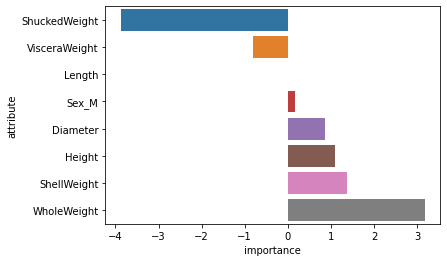

In [54]:
barh_plot(model_scaler, X_scaler)